In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
city_df = city_data.drop_duplicates('city', keep = 'first')


# Combine the data into a single dataset
city_ride_data_complete = pd.merge(ride_data, city_data, how="inner", on="city", sort='city')

# Display the data table for preview
city_ride_data_complete.head()


,city,date,fare,ride_id,driver_count,type
0,Amandaburgh,2018-03-05 02:15:38,26.28,906850928986,12,Urban
1,Amandaburgh,2018-02-24 23:10:49,43.66,6573820412437,12,Urban
2,Amandaburgh,2018-02-10 20:42:46,36.17,6455620849753,12,Urban
3,Amandaburgh,2018-01-11 02:22:07,29.24,7279902884763,12,Urban
4,Amandaburgh,2018-01-21 04:12:54,9.26,5528427024492,12,Urban


## Bubble Plot of Ride Sharing Data

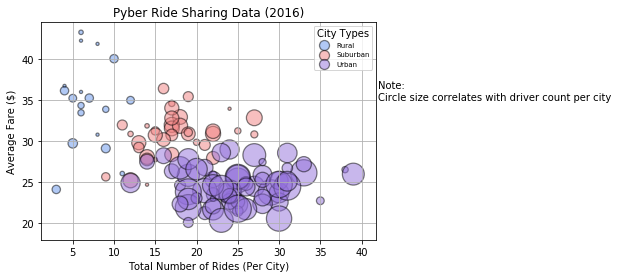

In [2]:
# Obtain the x and y coordinates for each of the three city types
new_groupby_df = city_ride_data_complete.groupby(['city', 'driver_count', 'type'])

new_city_ride_df = new_groupby_df['fare'].mean()
new_city_ride_df = pd.DataFrame(new_city_ride_df)
new_city_ride_df['ride_count'] = pd.DataFrame(new_groupby_df['ride_id'].count())
new_city_ride_df = new_city_ride_df.rename(columns = {'fare': "avg_fare"})
new_city_ride_df = new_city_ride_df.reset_index()

# Build the scatter plots for each city types
def get_type(ctype):
    city_type = new_city_ride_df.loc[new_city_ride_df['type'] == ctype]
    return(city_type)

rural = get_type("Rural")
suburban = get_type("Suburban")
urban = get_type("Urban")


fig, ax = plt.subplots(sharex = True)

rural.plot(kind = "scatter", x = 'ride_count', y = 'avg_fare', s = rural.driver_count * 10, subplots = True,
           c = "CornFlowerBlue", ax = ax, label = 'Rural', alpha = 0.5, edgecolors = "black", linewidth = 1.25)
suburban.plot(kind = "scatter", x = 'ride_count', y = 'avg_fare', s = suburban.driver_count * 10, subplots = True, 
           c = "LightCoral", ax = ax, label = 'Suburban', alpha = 0.5, edgecolors = "black", linewidth = 1.25)
urban.plot(kind = "scatter", x = 'ride_count', y = 'avg_fare', s = urban.driver_count * 10, subplots = True, 
           c = "MediumPurple", ax = ax, label = 'Urban', alpha = 0.5, edgecolors = "black", linewidth = 1.25)

# Incorporate the other graph properties
ax.grid()
ax.set(title = 'Pyber Ride Sharing Data (2016)', ylabel = 'Average Fare ($)', xlabel = 'Total Number of Rides (Per City)')


# Create a legend
lgnd = plt.legend(loc = "upper right", title = "City Types", fontsize = "x-small")
lgnd.legendHandles[0]._sizes = [100]
lgnd.legendHandles[1]._sizes = [100]
lgnd.legendHandles[2]._sizes = [100]

# Incorporate a text label regarding circle size
ax.text(42, 35, s = 'Note:\nCircle size correlates with driver count per city')


# Save Figure
plt.savefig('Pyber Ride Sharing Data.png')
plt.show


## Total Fares by City Type

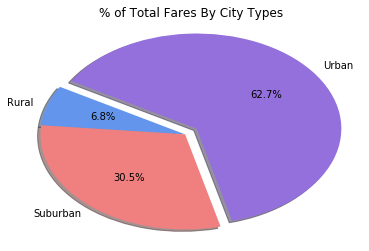

In [6]:
# Calculate Type Percents
fare_total = city_ride_data_complete.groupby(['type'])['fare'].sum()

# Build Pie Chart
labels = ["Rural","Suburban","Urban" ]
colors = ["CornFlowerBlue", "LightCoral", "MediumPurple"]


plt.title("% of Total Fares By City Types")
plt.pie(fare_total, explode=(0, 0, 0.1), labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=150)
plt.axis("tight")

# Save Figure
plt.savefig("% of Total Fares By City Types.png")
plt.show()


## Total Rides by City Type

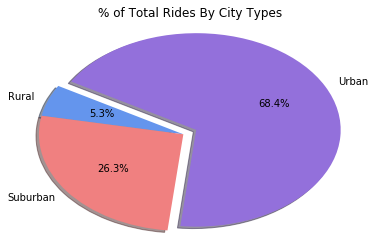

<Figure size 432x288 with 0 Axes>

In [4]:
# Calculate Ride Percents
rides_total = city_ride_data_complete.groupby(['type'])['ride_id'].count()

# Build Pie Chart
labels = ["Rural","Suburban","Urban" ]
colors = ["CornFlowerBlue", "LightCoral", "MediumPurple"]


plt.title("% of Total Rides By City Types")
plt.pie(rides_total, explode=(0, 0, 0.1), labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.axis("tight")

# Save Figure
plt.savefig("% of Total Rides By City Types.png")
plt.show()


## Total Drivers by City Type

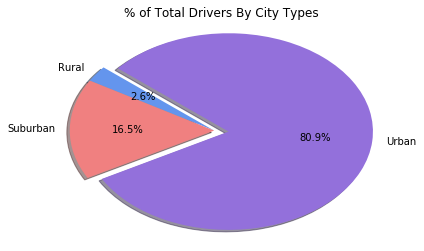

<Figure size 432x288 with 0 Axes>

In [5]:
# Calculate Driver Percents
driver_total = city_df.groupby(['type'])['driver_count'].sum()

# Build Pie Charts
labels = ["Rural","Suburban","Urban" ]
colors = ["CornFlowerBlue", "LightCoral", "MediumPurple"]


plt.title("% of Total Drivers By City Types")
plt.pie(driver_total, explode=(0, 0, 0.1), labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("tight")

# Save Figure
plt.savefig("% of Total Drivers By City Types.png")
plt.show()
